**Deklarasi dan download dataset dari roboflow**

**Deklarasi lokasi dataset dan cek dataset sebelum train**

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="q9VzpoAEYNZZ6WOSZx86")
project = rf.workspace("tubesmikom-ett56").project("sampahdetection2")
version = project.version(2)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SampahDetection2-2 in yolov11:: 100%|██████████| 4374/4374 [00:00<00:00, 10831.21it/s]


In [2]:
print(dataset.location) #lokasi dataset

/kaggle/working/SampahDetection2-2


Lihat jumlah gambar dalam dataset

In [3]:
IMAGE_DIR = '/kaggle/working/SampahDetection2-2/test/images'# ganti dengan lokasi dataset
IMAGE_DIR_TRAIN = '/kaggle/working/SampahDetection2-2/train/images'# ganti dengan lokasi dataset
IMAGE_DIR_VALID = '/kaggle/working/SampahDetection2-2/valid/images'# ganti dengan lokasi dataset

In [4]:
from glob import glob
image_paths = glob(IMAGE_DIR + '/*.jpg')
print(f'Jumlah file gambar: {len(image_paths)}')
image_paths_train = glob(IMAGE_DIR_TRAIN + '/*.jpg')
print(f'Jumlah file gambar pada train: {len(image_paths_train)}')
image_paths_valid = glob(IMAGE_DIR_VALID + '/*.jpg')
print(f'Jumlah file gambar pada valid: {len(image_paths_valid)}')

Jumlah file gambar: 226
Jumlah file gambar pada train: 1515
Jumlah file gambar pada valid: 440


Lihat Jumlah label dalam dataset

In [5]:
ANNOTATION_DIR = '/kaggle/working/SampahDetection2-2/test/labels'# ganti dengan lokasi dataset
ANNOTATION_DIR_TRAIN = '/kaggle/working/SampahDetection2-2/train/labels'# ganti dengan lokasi dataset
ANNOTATION_DIR_VALID = '/kaggle/working/SampahDetection2-2/valid/labels'# ganti dengan lokasi dataset

In [6]:
annotation_paths = glob(ANNOTATION_DIR + '/*.txt')
print(f'Jumlah file anotasi txt: {len(annotation_paths)}')
annotation_paths_train = glob(ANNOTATION_DIR_TRAIN + '/*.txt')
print(f'Jumlah file anotasi txt pada train: {len(annotation_paths_train)}')
annotation_paths_valid = glob(ANNOTATION_DIR_VALID + '/*.txt')
print(f'Jumlah file anotasi txt pada valid: {len(annotation_paths_valid)}')

Jumlah file anotasi txt: 226
Jumlah file anotasi txt pada train: 1515
Jumlah file anotasi txt pada valid: 440


In [7]:
amount_per_class = {}
for i in range(len(annotation_paths)):  
    f = open(annotation_paths[i], "r") 
    for anotate in f:      
        if anotate[0] not in amount_per_class.keys():        
            amount_per_class[anotate[0]] = 1      
        else:        
            amount_per_class[anotate[0]] += 1
print(f"Jumlah total objek: {sum(amount_per_class.values())}")
print(f'Jumlah objek per class: {amount_per_class}')

Jumlah total objek: 226
Jumlah objek per class: {'2': 89, '0': 75, '1': 62}


In [8]:
amount_per_class = {}
for i in range(len(annotation_paths_train)):  
    f = open(annotation_paths_train[i], "r")  
    for anotate in f:      
        if anotate[0] not in amount_per_class.keys():        
            amount_per_class[anotate[0]] = 1      
        else:        amount_per_class[anotate[0]] += 1
print(f"Jumlah total objek pada train: {sum(amount_per_class.values())}")
print(f'Jumlah objek per class pada train: {amount_per_class}')

Jumlah total objek pada train: 1515
Jumlah objek per class pada train: {'0': 507, '2': 591, '1': 417}


In [9]:
amount_per_class = {}
for i in range(len(annotation_paths_valid)):  
    f = open(annotation_paths_valid[i], "r")  
    for anotate in f:      
        if anotate[0] not in amount_per_class.keys():        
            amount_per_class[anotate[0]] = 1      
        else:        amount_per_class[anotate[0]] += 1
print(f"Jumlah total objek pada valid: {sum(amount_per_class.values())}")
print(f'Jumlah objek per class pada valid: {amount_per_class}')

Jumlah total objek pada valid: 440
Jumlah objek per class pada valid: {'1': 121, '0': 147, '2': 172}


**Mulai train dengan model yolov11**

In [10]:
!pip install ultralytics
from ultralytics import YOLO
epoch= 20 #isi dengan jumlah epoch yang diinginkan
model = YOLO("yolo11n.pt") 
results = model.train(data=dataset.location + "/data.yaml", epochs=epoch)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 23.7 MB/s eta 0:00:0000:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 116MB/s]


Ultralytics 8.3.55 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/SampahDetection2-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 26.1MB/s]
2024-12-28 04:20:59,636	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-12-28 04:21:00,531	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/working/SampahDetection2-2/train/labels... 1515 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1515/1515 [00:01<00:00, 1080.60it/s]


train: New cache created: /kaggle/working/SampahDetection2-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.24 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/SampahDetection2-2/valid/labels... 440 images, 0 backgrounds, 0 corrupt: 100%|██████████| 440/440 [00:00<00:00, 1124.51it/s]


val: New cache created: /kaggle/working/SampahDetection2-2/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.39G      1.173      2.223      1.462         26        640: 100%|██████████| 95/95 [00:17<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.59it/s]


                   all        440        440      0.857      0.795      0.904      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.37G      1.104      1.359      1.377         21        640: 100%|██████████| 95/95 [00:16<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]


                   all        440        440      0.706      0.772      0.821      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.37G      1.107      1.153      1.367         28        640: 100%|██████████| 95/95 [00:15<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.35it/s]


                   all        440        440      0.934      0.889      0.964      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.37G      1.058     0.9578      1.327         29        640: 100%|██████████| 95/95 [00:15<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.43it/s]


                   all        440        440      0.952      0.943      0.983      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.37G      1.086      0.857      1.336         29        640: 100%|██████████| 95/95 [00:16<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.57it/s]


                   all        440        440      0.989      0.973      0.987      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.36G      1.023     0.7701      1.302         29        640: 100%|██████████| 95/95 [00:15<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.76it/s]

                   all        440        440      0.995      0.987      0.994      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.37G      0.984     0.7208      1.283         17        640: 100%|██████████| 95/95 [00:16<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.72it/s]

                   all        440        440       0.98      0.967      0.988      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.37G      0.968     0.6519      1.267         23        640: 100%|██████████| 95/95 [00:16<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.19it/s]

                   all        440        440      0.995      0.986      0.994      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.37G     0.9387     0.6208      1.248         26        640: 100%|██████████| 95/95 [00:16<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.65it/s]

                   all        440        440      0.991      0.991      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.35G     0.9123      0.592      1.236         22        640: 100%|██████████| 95/95 [00:16<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.70it/s]

                   all        440        440      0.994      0.997      0.995      0.797


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.44G     0.7922     0.4978      1.239         11        640: 100%|██████████| 95/95 [00:16<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.71it/s]

                   all        440        440      0.986      0.994      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.37G     0.7405     0.4223      1.195         11        640: 100%|██████████| 95/95 [00:16<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.72it/s]

                   all        440        440      0.992      0.984      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.37G     0.7201     0.4004      1.181         11        640: 100%|██████████| 95/95 [00:15<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.58it/s]

                   all        440        440      0.999      0.994      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.35G     0.7084     0.3844      1.175         11        640: 100%|██████████| 95/95 [00:15<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.78it/s]

                   all        440        440      0.993      0.993      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.37G     0.6618      0.361      1.145         11        640: 100%|██████████| 95/95 [00:16<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.84it/s]

                   all        440        440      0.998      0.987      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.37G     0.6336     0.3368      1.111         11        640: 100%|██████████| 95/95 [00:15<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.02it/s]

                   all        440        440      0.992      0.997      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.37G     0.6064      0.324      1.095         11        640: 100%|██████████| 95/95 [00:16<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.90it/s]

                   all        440        440      0.998      0.996      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.35G     0.5748     0.3035      1.078         11        640: 100%|██████████| 95/95 [00:15<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.21it/s]

                   all        440        440      0.992      0.999      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.37G     0.5625     0.2996      1.063         11        640: 100%|██████████| 95/95 [00:15<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.23it/s]

                   all        440        440      0.995      0.996      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.37G     0.5384     0.2846      1.038         11        640: 100%|██████████| 95/95 [00:16<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.81it/s]

                   all        440        440      0.997      0.997      0.995      0.885



20 epochs completed in 0.110 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.31it/s]


                   all        440        440      0.997      0.997      0.995      0.885
             anorganik        147        147          1          1      0.995      0.837
                    b3        121        121      0.991      0.992      0.995      0.872
               organik        172        172          1          1      0.995      0.945
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


**Perlihatkan metric dari model kalian**

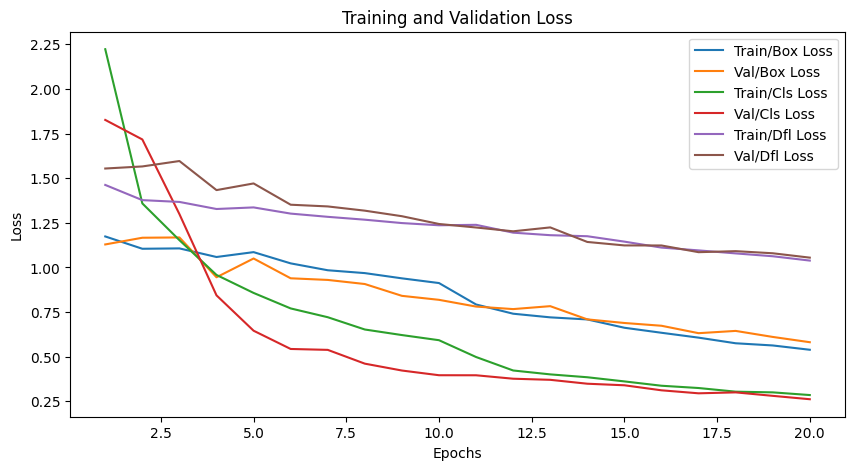

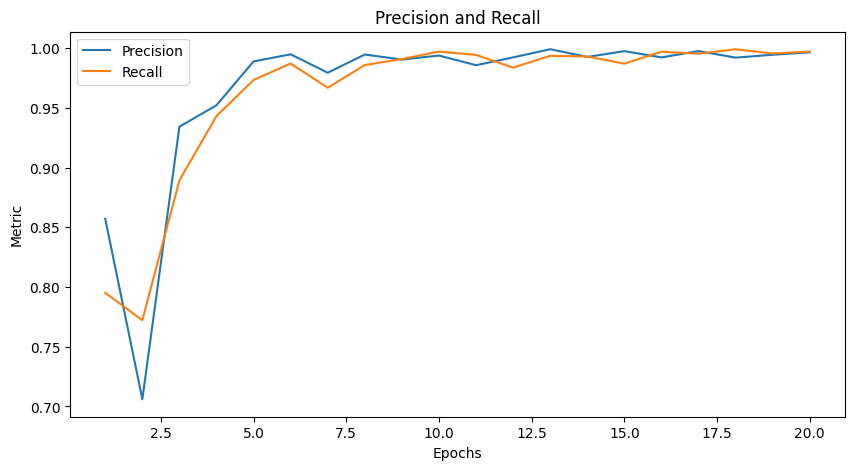

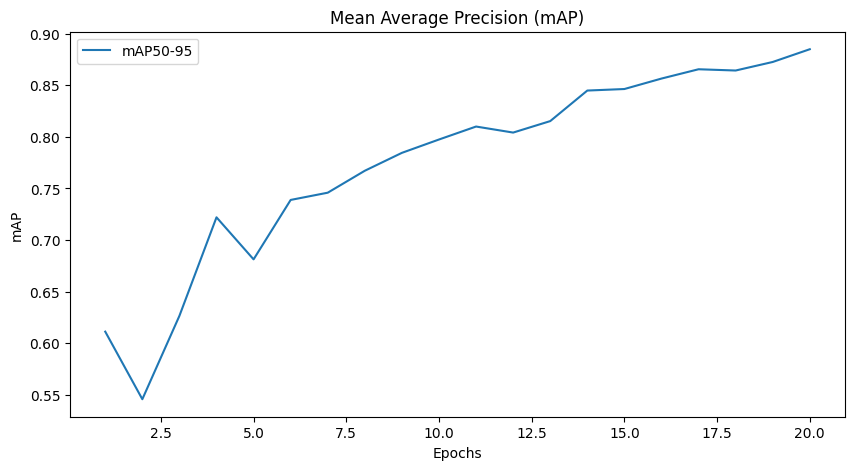

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results.csv file
file_path = '/kaggle/working/runs/detect/train/results.csv'
results_df = pd.read_csv(file_path)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train/Box Loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Val/Box Loss')
plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Train/Cls Loss')
plt.plot(results_df['epoch'], results_df['val/cls_loss'], label='Val/Cls Loss')
plt.plot(results_df['epoch'], results_df['train/dfl_loss'], label='Train/Dfl Loss')
plt.plot(results_df['epoch'], results_df['val/dfl_loss'], label='Val/Dfl Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot precision and recall
plt.figure(figsize=(10, 5))
plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision')
plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall')
plt.title('Precision and Recall')
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.legend()
plt.show()

# Plot mAP
plt.figure(figsize=(10, 5))
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP50-95')
plt.title('Mean Average Precision (mAP)')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.legend()
plt.show()

**Test model dengan test set**

In [12]:
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt") # isi dengan path ke model kalian yang sudah selesai train
results = model.predict(source=dataset.location + "/test/images", save=True, conf=0.15) # predict semua gambar pada testset
metrics = model.val(data=dataset.location + "/data.yaml") # evaluasi model pada test set


image 1/226 /kaggle/working/SampahDetection2-2/test/images/WhatsApp-Video-2024-12-23-at-22_03_35_c256f900_mp4-0025_jpg.rf.2a22e216325afa3fee60cd2a666fc2da.jpg: 640x576 1 anorganik, 51.8ms
image 2/226 /kaggle/working/SampahDetection2-2/test/images/WhatsApp-Video-2024-12-23-at-22_03_35_c256f900_mp4-0029_jpg.rf.0009fd9020457c87e4967444f5af366d.jpg: 640x576 1 anorganik, 8.6ms
image 3/226 /kaggle/working/SampahDetection2-2/test/images/WhatsApp-Video-2024-12-23-at-22_03_35_c256f900_mp4-0037_jpg.rf.2c6e21b5307de6927dae06ce093f3304.jpg: 640x576 1 anorganik, 9.1ms
image 4/226 /kaggle/working/SampahDetection2-2/test/images/WhatsApp-Video-2024-12-23-at-22_03_35_c256f900_mp4-0039_jpg.rf.40b407a613f5500aa1247282f5e07c23.jpg: 640x576 1 anorganik, 8.7ms
image 5/226 /kaggle/working/SampahDetection2-2/test/images/WhatsApp-Video-2024-12-23-at-22_03_35_c256f900_mp4-0041_jpg.rf.a1ea057c78b16d4045fe652b6b688661.jpg: 640x576 1 anorganik, 8.8ms
image 6/226 /kaggle/working/SampahDetection2-2/test/images/What

val: Scanning /kaggle/working/SampahDetection2-2/valid/labels.cache... 440 images, 0 backgrounds, 0 corrupt: 100%|██████████| 440/440 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.59it/s]


                   all        440        440      0.997      0.997      0.995      0.884
             anorganik        147        147          1          1      0.995      0.836
                    b3        121        121      0.991      0.992      0.995      0.872
               organik        172        172          1          1      0.995      0.944
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val


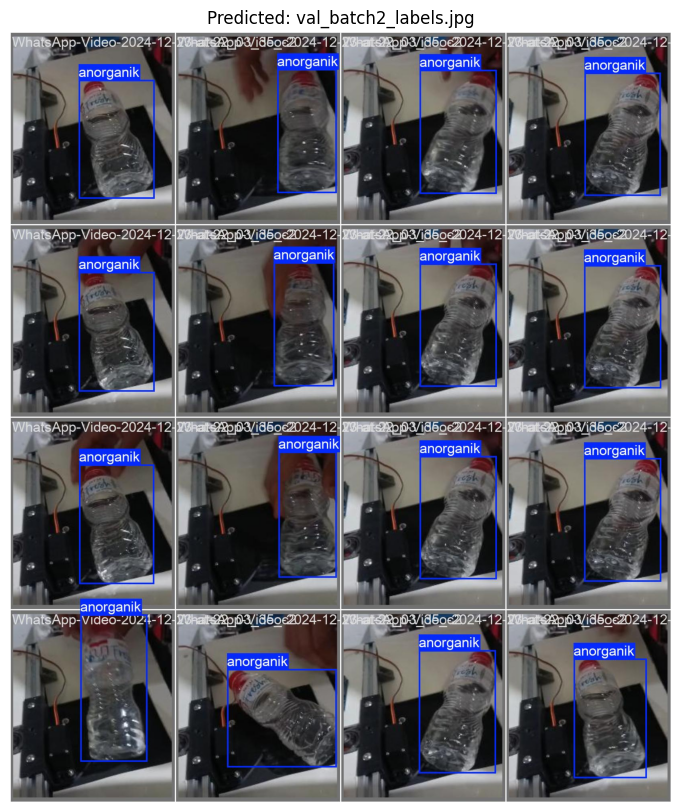

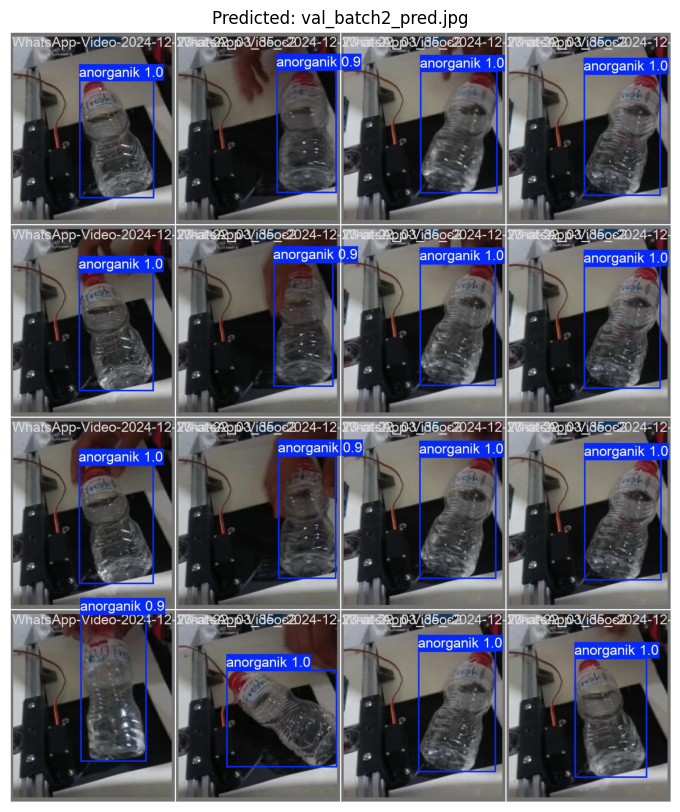

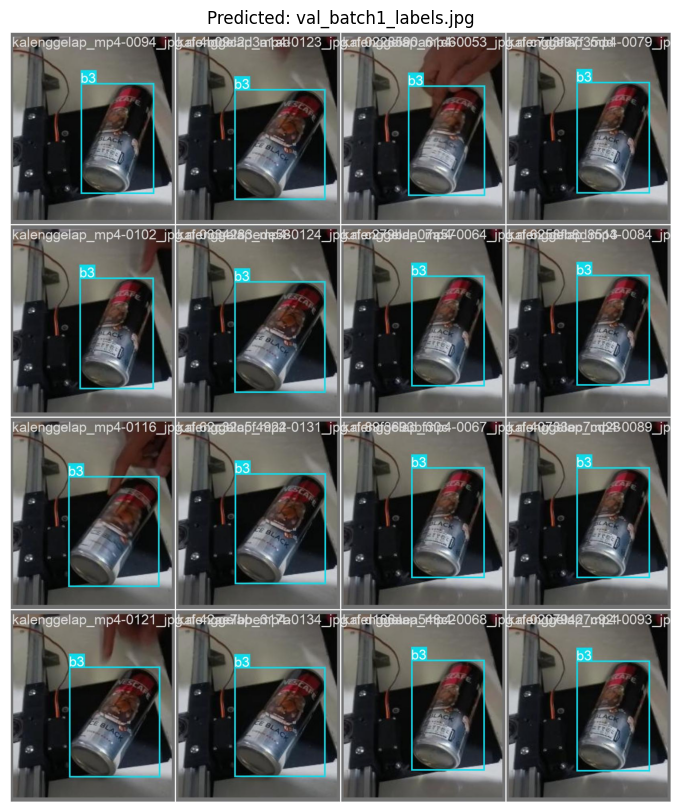

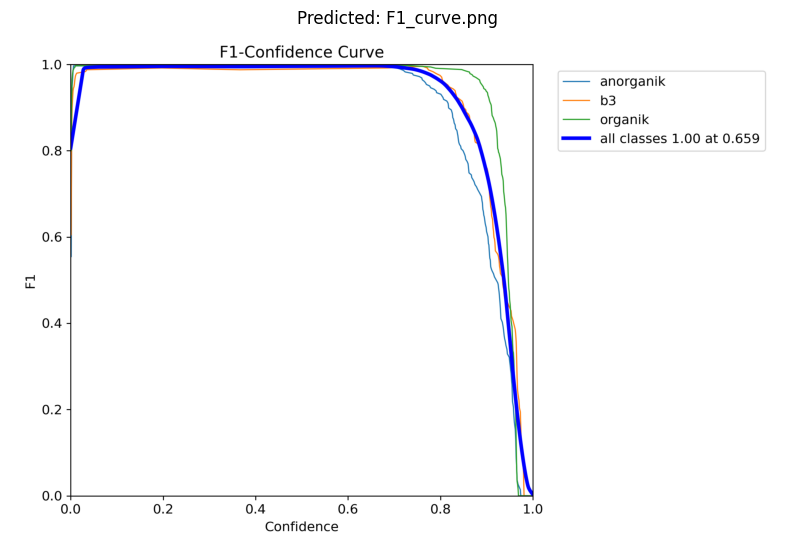

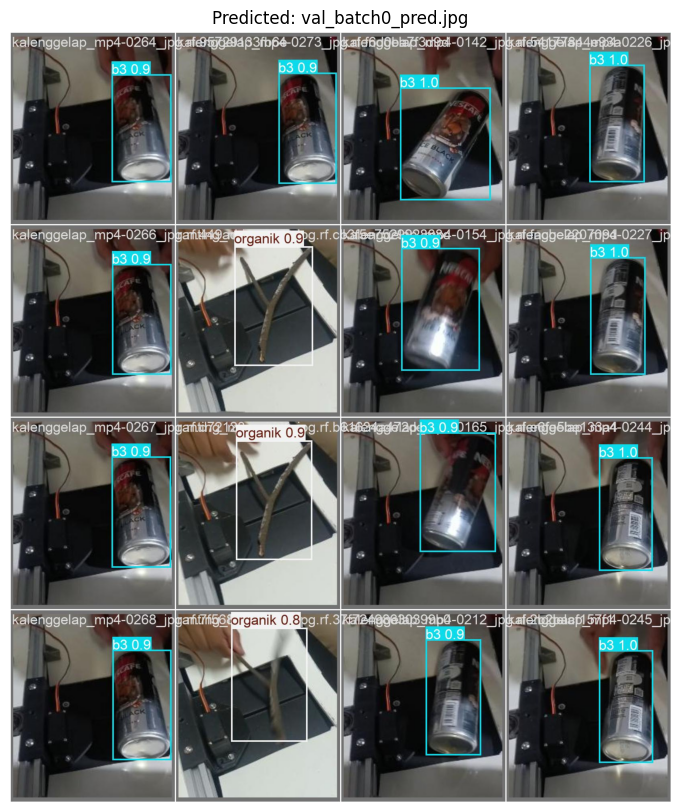

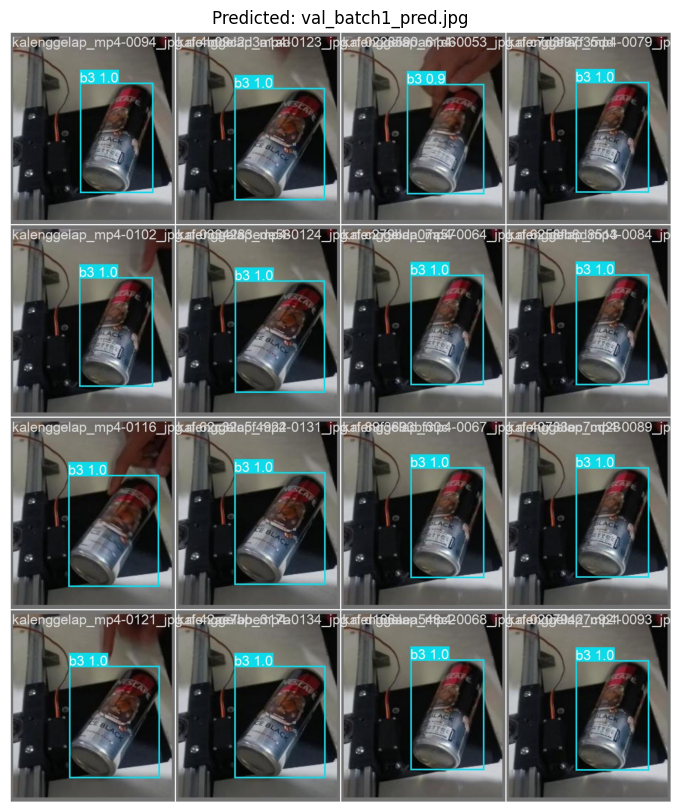

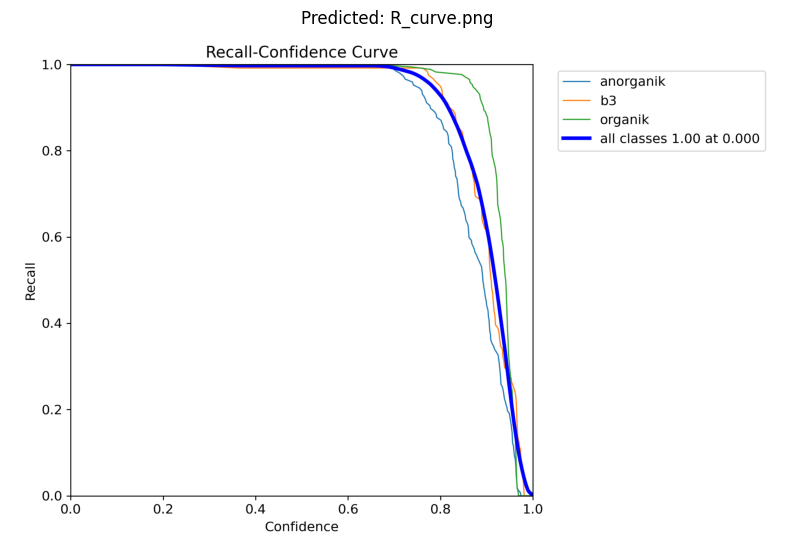

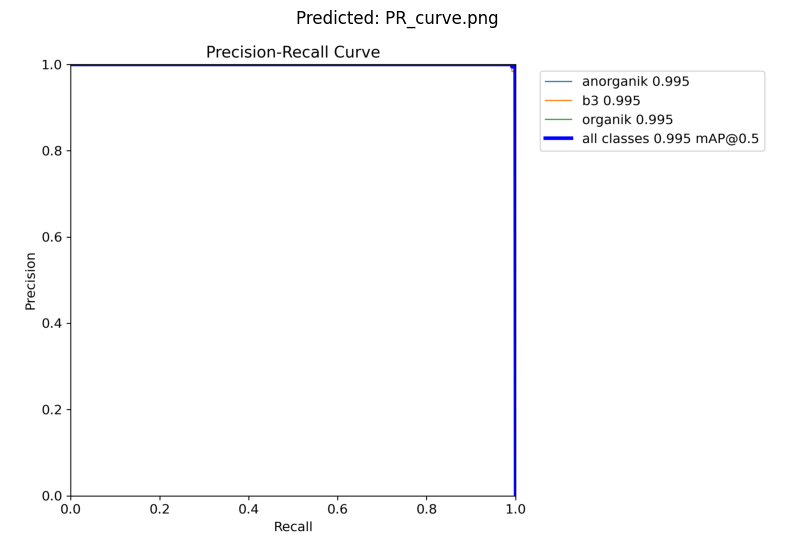

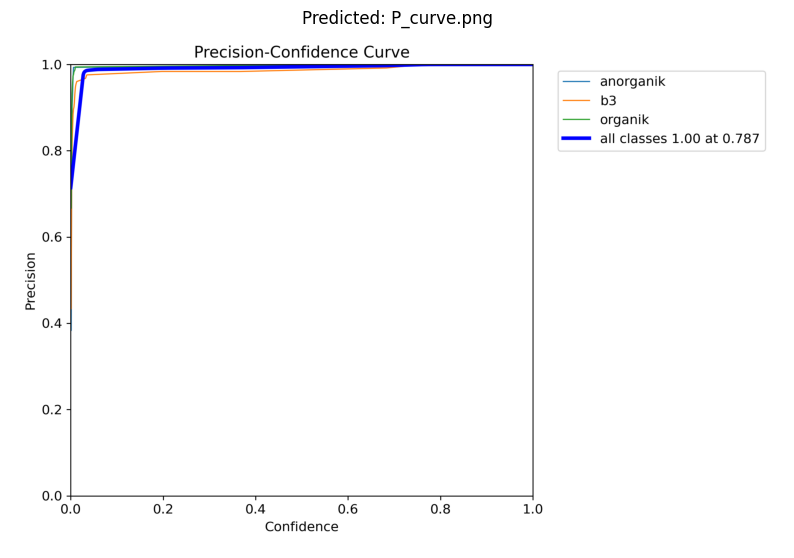

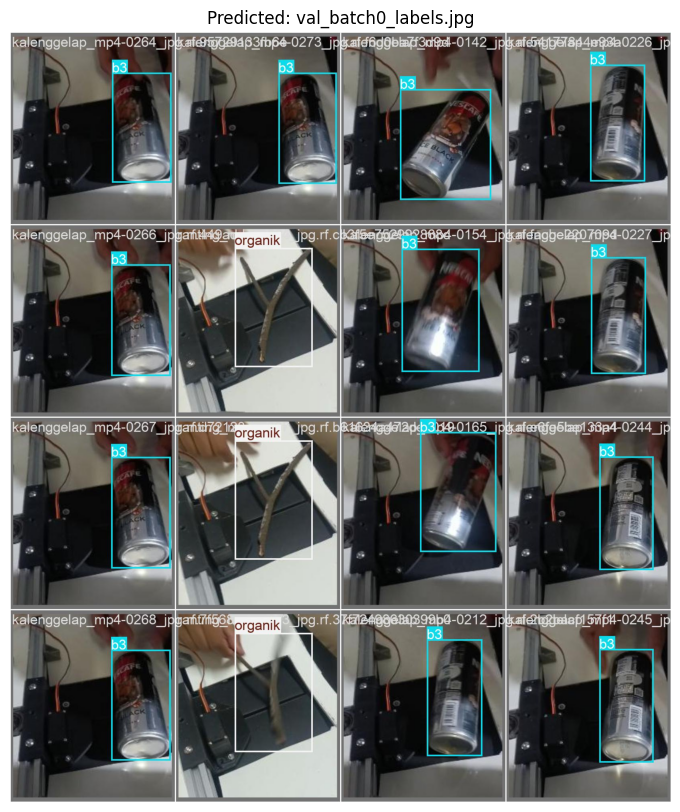

In [13]:
import matplotlib.pyplot as plt
saved_images_dir = "/kaggle/working/runs/detect/val" # isi dengan direktori gambar" yang telah diprediksi
import cv2
import os
image_files = [os.path.join(saved_images_dir, img) for img in os.listdir(saved_images_dir) if img.endswith(('.png', '.jpg'))]

for img_path in image_files[:10]:  # atur range dari gambar yang ingin di lihat
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off') 
    plt.title(f"Predicted: {os.path.basename(img_path)}")
    plt.show()

**Silahkan coba upload gambar kalian random dan predict dengan model kalian!**


0: 640x640 1 organik, 11.5ms
Speed: 2.3ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


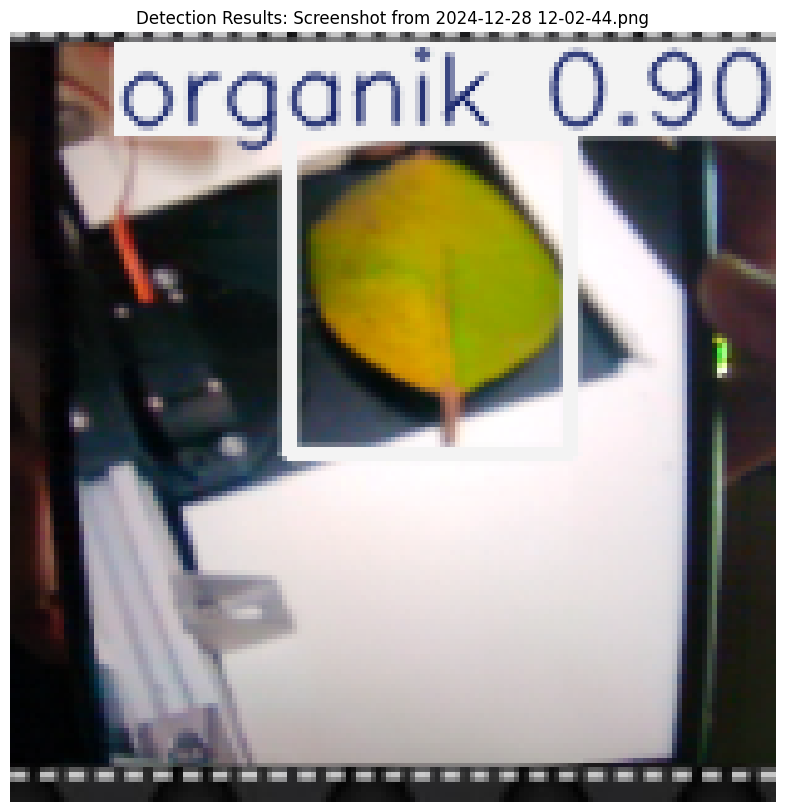

In [22]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# inisialisasi model YOLO
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")  # ganti dengan model YOLO yang sesuai

# fungsi untuk memuat gambar dari path yang diberikan
def load_images_from_path(image_dir):
    if not os.path.exists(image_dir):
        print(f"Path tidak ditemukan: {image_dir}")
        return []

    # jika path adalah file tunggal, langsung kembalikan dalam daftar
    if os.path.isfile(image_dir):
        if image_dir.endswith(('.png', '.jpg')):
            return [image_dir]
        else:
            print(f"File bukan gambar: {image_dir}")
            return []


# path gambar langsung dimasukkan di sini
image_dir = "/kaggle/input/dataset123455/Screenshot from 2024-12-28 12-02-44.png"
image_files = load_images_from_path(image_dir)



# fungsi untuk menampilkan hasil deteksi
def detect_and_display_images(model, image_paths, class_filter=None):
    for img_path in image_paths:
        img = cv2.imread(img_path)
        if img is None:
            print(f"Gambar tidak dapat dibaca: {img_path}")
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # konversi ke RGB untuk matplotlib

        # jalankan prediksi menggunakan model YOLO
        results = model.predict(img)
        annotated_frame = results[0].plot()  # annotasi deteksi

        # filter berdasarkan class (opsional)
        if class_filter is not None:
            filtered_results = [det for det in results[0].boxes.data if det[5] in class_filter]
            if len(filtered_results) == 0:
                continue

    for img_path in image_files[:5]:  # atur range dari gambar yang ingin di lihat
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        # tampilkan gambar yang telah diannotasi
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Detection Results: {os.path.basename(img_path)}")
        plt.show()

if image_files:
    # filter class jika diperlukan
    class_filter = ["0"]  # ganti dengan class yang ada di dataset

    # deteksi dan tampilkan gambar
    detect_and_display_images(model, image_files, class_filter=class_filter)
else:
    print("Tidak ada gambar untuk diproses.")